## 4. Data Collection and Exploratory Data Analysis

### 4.1 Data Collection and Web Scraping

We collect images of doodles and real photos from Google search by scraping using [SerpApi](https://serpapi.com/). A total of 4005 doodles and 905 reals were collected. On Google search, we query a combination of the class and terms such as "doodle", "sketch", "drawing easy" and "doodle single", e.g. "airplane doodle", "cat sketch". A variety of other sources of doodles and reals are used to supplement the collected dataset, e.g. CIFAR, Sketchy, TUBerlin.

### 4.2 Image Preprocessing

Many Google images are coloured, although we are strictly interested in doodles that are black-white, so we use OpenCV to convert RGB to grayscale. There are also cases of images where the background is black while the outlines are white, so we flip the image pixel values by minusing 255. Duplicates are also removed to prevent test set leakage. Because images are all of different sizes, we standardise image sizes to 64x64 for doodles and 64x64x3 for reals.

Image shape: (256, 256)
No. classes: 9
Classes: airplane, car, bird, cat, dog, frog, horse, ship, truck
Count per class:
- airplane: 433
- car: 459
- bird: 455
- cat: 456
- dog: 454
- frog: 391
- horse: 459
- ship: 462
- truck: 436
Dataset size: 4005


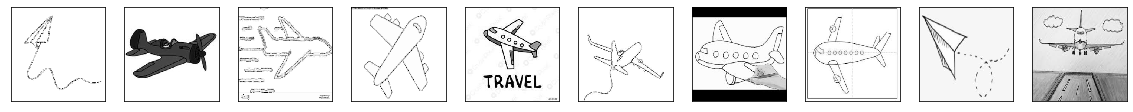

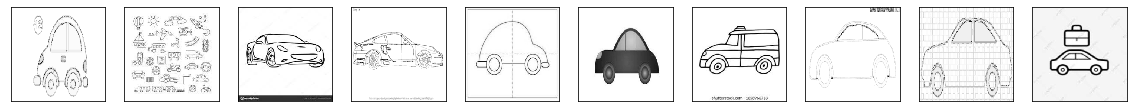

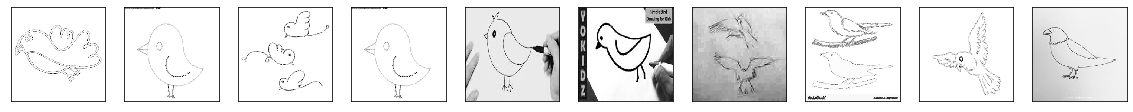

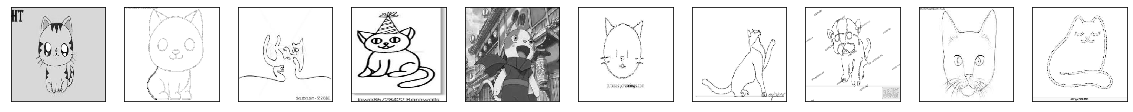

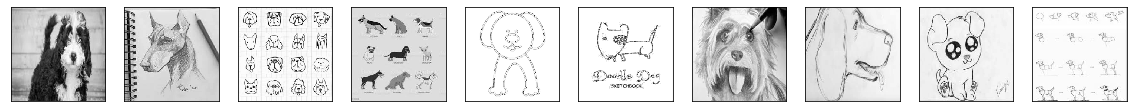

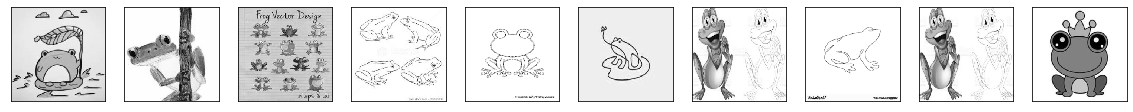

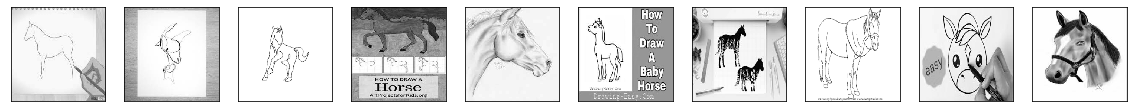

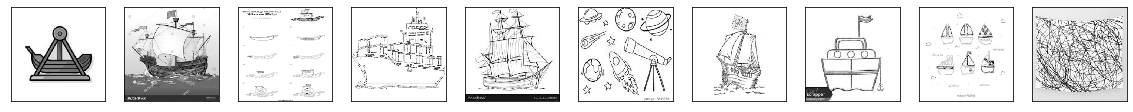

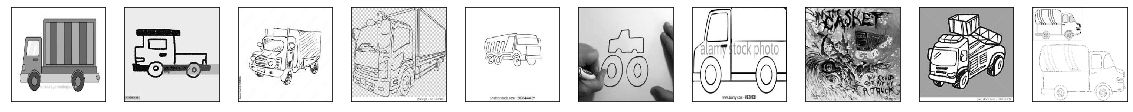

In [1]:
from dataset_collection import *

d = get_google_doodles()
print_dataset(d)
plot_dataset(d)

Image shape: (256, 256, 3)
No. classes: 9
Classes: airplane, car, bird, cat, dog, frog, horse, ship, truck
Count per class:
- airplane: 105
- car: 100
- bird: 100
- cat: 100
- dog: 100
- frog: 100
- horse: 100
- ship: 100
- truck: 100
Dataset size: 905


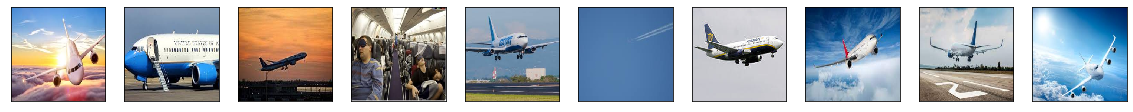

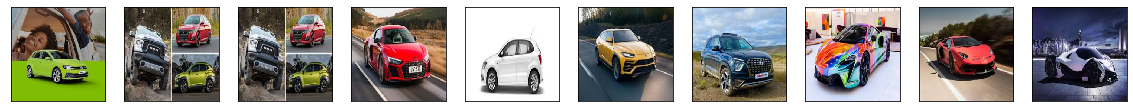

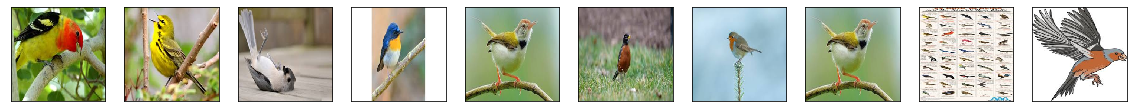

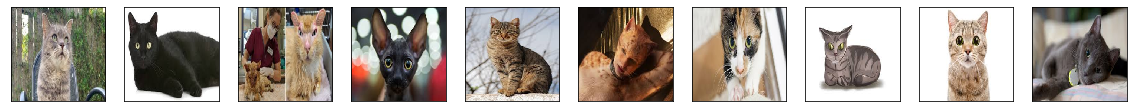

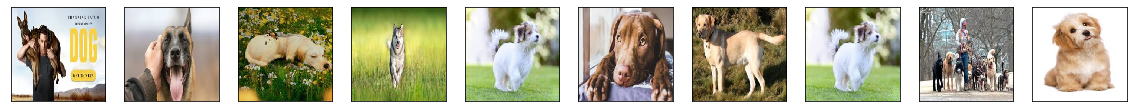

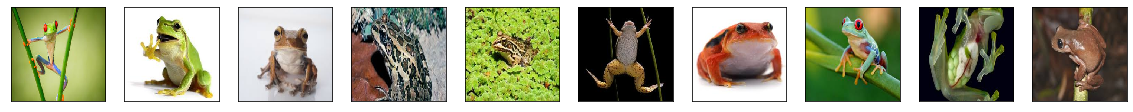

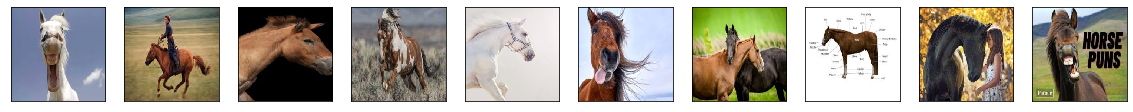

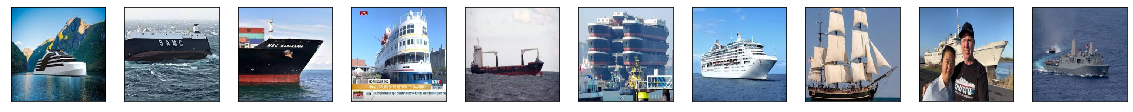

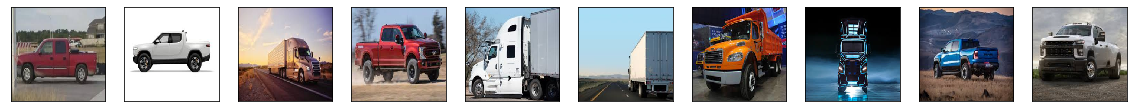

In [2]:
d = get_google_real()
print_dataset(d)
plot_dataset(d)

### 4.2 Dataset Statistics

The Google search datasets scraped (reals and doodles) do not face the problem of class imbalance.

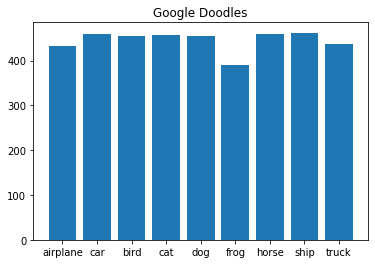

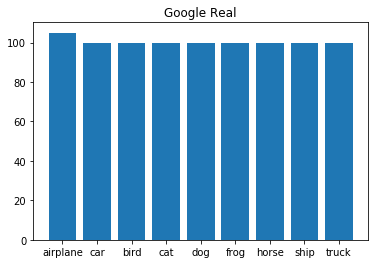

In [3]:
from dataset_analysis import *

d = get_google_doodles()
plot_dataset_dist(d, title="Google Doodles")

d = get_google_real()
plot_dataset_dist(d, title="Google Real")

In [4]:
d = collapse_datasets(get_doodle_datasets())
print_dataset(d)

d = collapse_datasets(get_real_datasets())
print_dataset(d)

Image shape: (64, 64)
No. classes: 9
Classes: airplane, bird, car, cat, dog, frog, horse, ship, truck
Count per class:
- airplane: 2041
- bird: 2039
- car: 2073
- cat: 2048
- dog: 2046
- frog: 1973
- horse: 2064
- ship: 1462
- truck: 2040
Dataset size: 17786
Image shape: (64, 64, 3)
No. classes: 9
Classes: airplane, car, bird, cat, dog, frog, horse, ship, truck
Count per class:
- airplane: 6205
- car: 6200
- bird: 6200
- cat: 6200
- dog: 6200
- frog: 6200
- horse: 6200
- ship: 6100
- truck: 6200
Dataset size: 55705


### 4.3 Dataset Visualization
To understand the general distribution of the datasets visually, we plot the pixel-wise mean of images in each dataset by class. We can see that for some classes of real, the background colour is obvious, e.g. blue for airplane because airplanes are likely in the sky, and green for bird because birds are likely spotted on grass or a tree. For doodles, commonly used outlines can be observed visually.

cifar


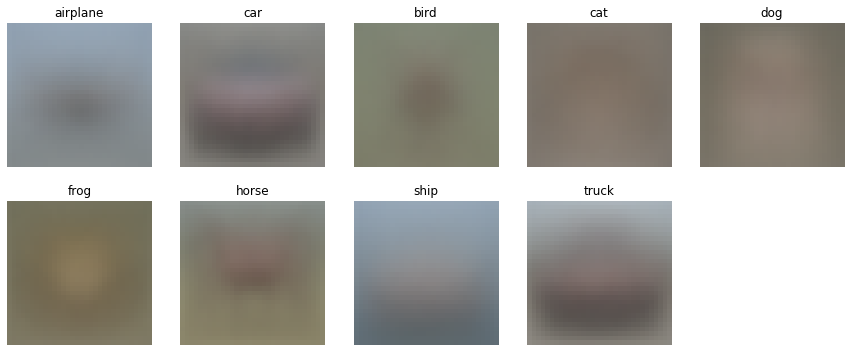

quickdraw


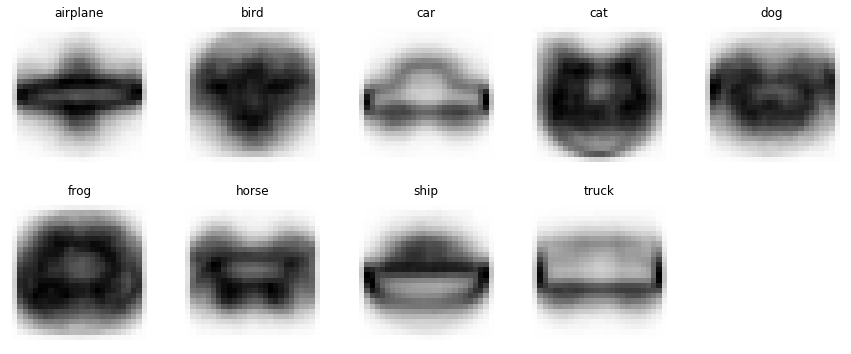

sketchy_real


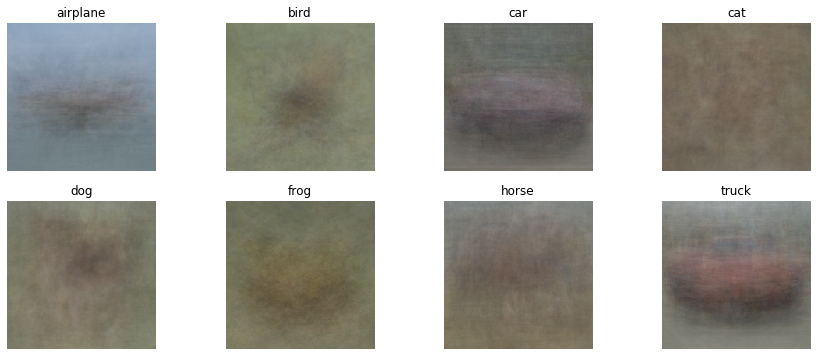

sketchy_doodle


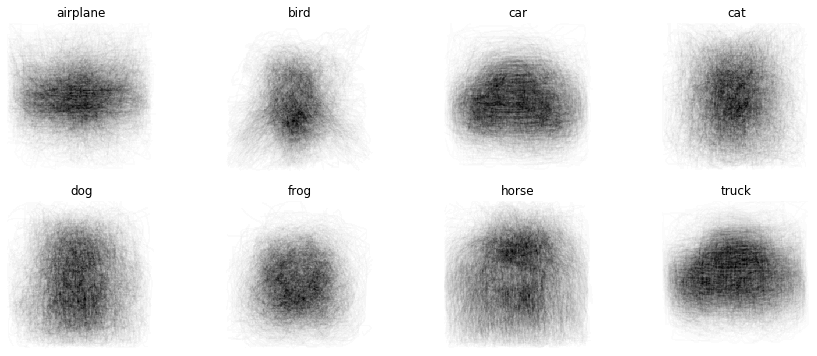

tuberlin


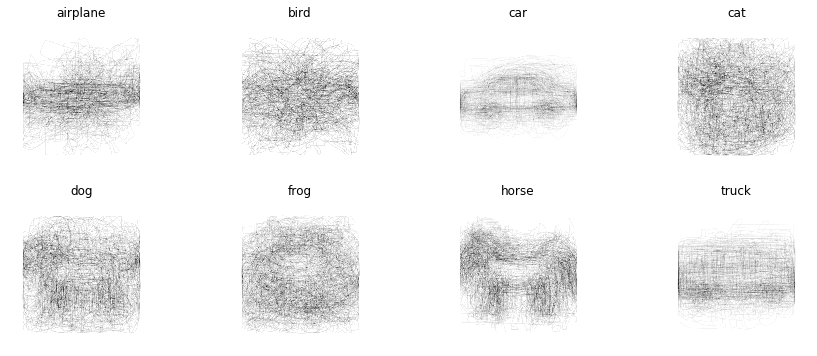

google_doodles


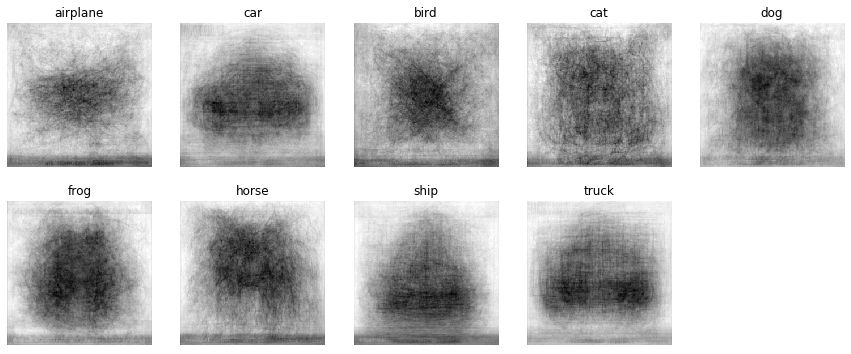

google_real


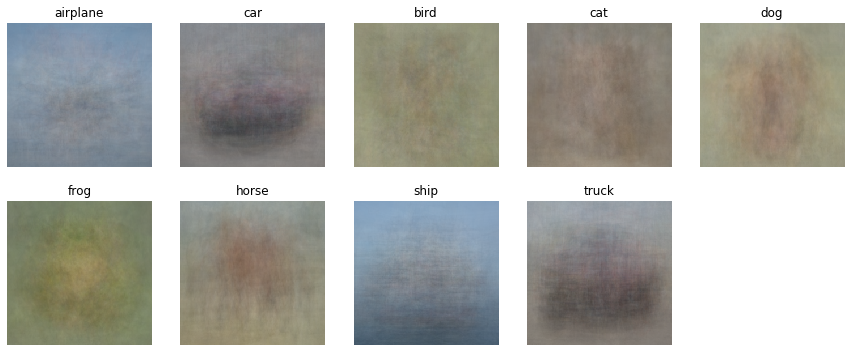

In [8]:
dd = get_all_datasets()
for name, d in dd.items():
    print(name)
    plot_dataset_mean(d)

In [ ]:
from model_training import *

def test_search_acc(doodle_model, real_model, engine, n=100, k=10, verbose=False):
    """
    n is the number of queries 
    k is the top-k value for the engine
    verbose = True will show the testing progress
    """

    accs = []
    for i in range(n):
        idx = random.randint(0, len(val_set) - 1)    # sample a random index
        doodle, doodle_label = val_set[i]  # a random doodle sample
        out_samples = engine.query(doodle.numpy(), topk=k)
        num_correct = 0
        for img, img_label in out_samples:
            num_correct += 1 if img_label == doodle_label else 0
        accs.append(num_correct / k)
        
        if i % 10 == 0 and verbose:
            print(i, n)
        
    return sum(accs)/len(accs)

In [19]:
from engine import Engine3

mlp_doodle = load_model(MLP(n_input=64*64, n_linear=2), "exp_data/mlp-doodle/mlp-doodle_model.pt").eval()
mlp_real = load_model(MLP(n_input=64*64*3, n_linear=2), "exp_data/mlp-real/mlp-real_model.pt").eval()

engine = Engine3(RealDataset(train=False), mlp_doodle, mlp_real)  # pass in the val_set and the trained models
test_search_acc(mlp_doodle, mlp_real, engine)

building database... [0 / 11141]
building database... [1000 / 11141]
building database... [2000 / 11141]
building database... [3000 / 11141]
building database... [4000 / 11141]
building database... [5000 / 11141]
building database... [6000 / 11141]
building database... [7000 / 11141]
building database... [8000 / 11141]
building database... [9000 / 11141]
building database... [10000 / 11141]
building database... [11000 / 11141]
Engine ready. Database size: 11141


NameError: name 'val_set' is not defined

In [ ]:
engine = Engine3(RealDataset(train=False), mlp_doodle, mlp_real)

building database... [0 / 11141]
building database... [1000 / 11141]
building database... [2000 / 11141]
building database... [3000 / 11141]
building database... [4000 / 11141]
building database... [5000 / 11141]
building database... [6000 / 11141]
building database... [7000 / 11141]
building database... [8000 / 11141]
building database... [9000 / 11141]
building database... [10000 / 11141]
building database... [11000 / 11141]
Engine ready. Database size: 11141


In [13]:
mlp_doodle = load_model(MLP(n_input=64*64, n_linear=2), "exp_data/mlp-doodle/mlp-doodle_model.pt").eval()
mlp_real = load_model(MLP(n_input=64*64*3, n_linear=2), "exp_data/mlp-real/mlp-real_model.pt").eval()

test_search_acc(mlp_doodle, mlp_real, engine)

0.09599999999999989

In [14]:
cnn_doodle = load_model(CNN(n_channels=1), "exp_data/cnn-doodle/cnn-doodle_model.pt").eval()
cnn_real = load_model(CNN(n_channels=3), "exp_data/cnn-real/cnn-real_model.pt").eval()

test_search_acc(cnn_doodle, cnn_real, engine)

0.09599999999999989

In [16]:
cnncl = load_model(CNNCL(), "exp_data/cnncl-contrastive/cnncl-contrastive_model.pt")
cnncl_doodle = cnncl.dmodel.eval()
cnncl_real = cnncl.rmodel.eval()

test_search_acc(cnncl_doodle, cnncl_real, engine)

0.09599999999999989